# Introduction to OpenCV
## Computer Vision and Image Processing - Lab Session 2
### Prof: Luigi Di Stefano, luigi.distefano@unibo.it
### Tutor: Alex Costanzino, alex.costanzino@unibo.it, Iacopo Curti, iacopo.curti2@unibo.it

## 1. OpenCV

OpenCV is a library of programming functions primarily designed for real-time computer vision.

The library has more than 2500 optimised algorithms, which include a comprehensive set of both classic and state-of-the-art computer vision and machine learning algorithms.

To import the library in your Python program, simply type:

In [1]:
import cv2

To test if your import succeds, we can print each library version number:

In [2]:
print("The OpenCV version is:", cv2.__version__)

The OpenCV version is: 4.12.0


We also need to import **NumPy** and **Matplotlib** to work and display images in Python:

In [3]:
import numpy as np
from matplotlib import pyplot as plt

# Only for jupyter notebook visualization
%matplotlib inline 

## 2. Load an image

With the following snippet, you will be able load an image:


In [4]:
image = cv2.imread('avengers.png')

The function `cv2.imread(*filename*)` loads the image from the `filename` path. 

Although in this case we passed the **relative path** to the folder where you have the notebooks, you can also pass the **absolute path** to the image.

**What is an image under the hood in Python?**

In [5]:
print(type(image))

<class 'numpy.ndarray'>


* In C++, OpenCV employs its Mat matrix structure;
* But in **Python**, OpenCV represents images as **NumPy n-dimensional arrays**

Since images are NumPy arrays, you are able to use all NumPy methods on images.

For example we can print the shape of the image as we do with numpy arrays:

In [6]:
print(image.shape)

(549, 910, 3)


The shape in case of images represents the **Height** and the **Width** of the image, along with the numbers of **channels**.

In this case your image has an **Height = 549**, a **Width = 910** and **Channels = 3**. The shape *(H,W,C)* is a **Tuple**.


In [7]:
# Printing height width and channels separately
height = image.shape[0]
width = image.shape[1]
ch = image.shape[2]

print("The Height is:",height)
print("The Width is: ",width)
print("The Number of Channels is: ",ch)

The Height is: 549
The Width is:  910
The Number of Channels is:  3


Moreover, if you want to get the bit-depth (the number of bits per pixel) of an image you can print the dtype of the array.

In [8]:
print(image.dtype)

uint8


Images have usually 8-bit depth, therefore, each pixel contains a value from 0 to 255 ($2^{8}-1$).

## 3. Display the image

Using Matplotlib we are able to display the image:

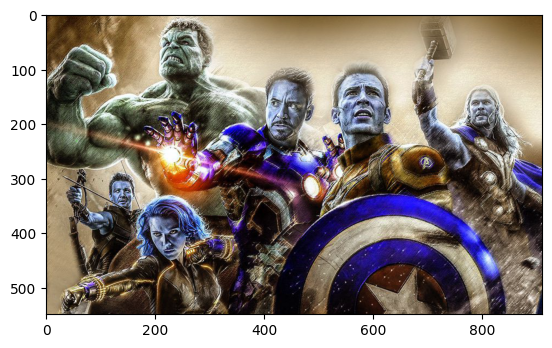

In [9]:
plt.imshow(image)
plt.show()

Why are the colours strange? 

Usually, coloured images have 3 channels: **Red**, **Green** and **Blue** (**RGB**). Matplotlib requires images in this format to display them correctly. 

On the other hand, **OpenCV loads images as Blue, Green and Red** (**BGR**). 

It is just a convention. So if you want to  plot images with original colours using the library **matplotlib**, you need a conversion!

In [10]:
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

And then, plot the new version:

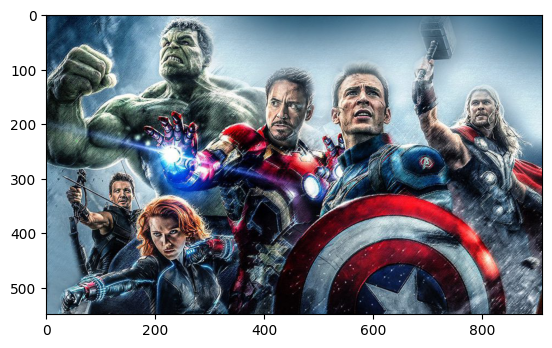

In [11]:
plt.imshow(image_rgb)
plt.show()

The function `cv2.cvtColor(image, conversion_type)` will return the modified version of the original `image` applying the conversion represented by `conversion_type`. In this case, the `conversion_type` is **cv2.COLOR_BGR2RGB**, that means a conversion from BGR to RGB. 

You can also set the figure dimension using `plt.figure(figsize=(height_value, width_value))`.

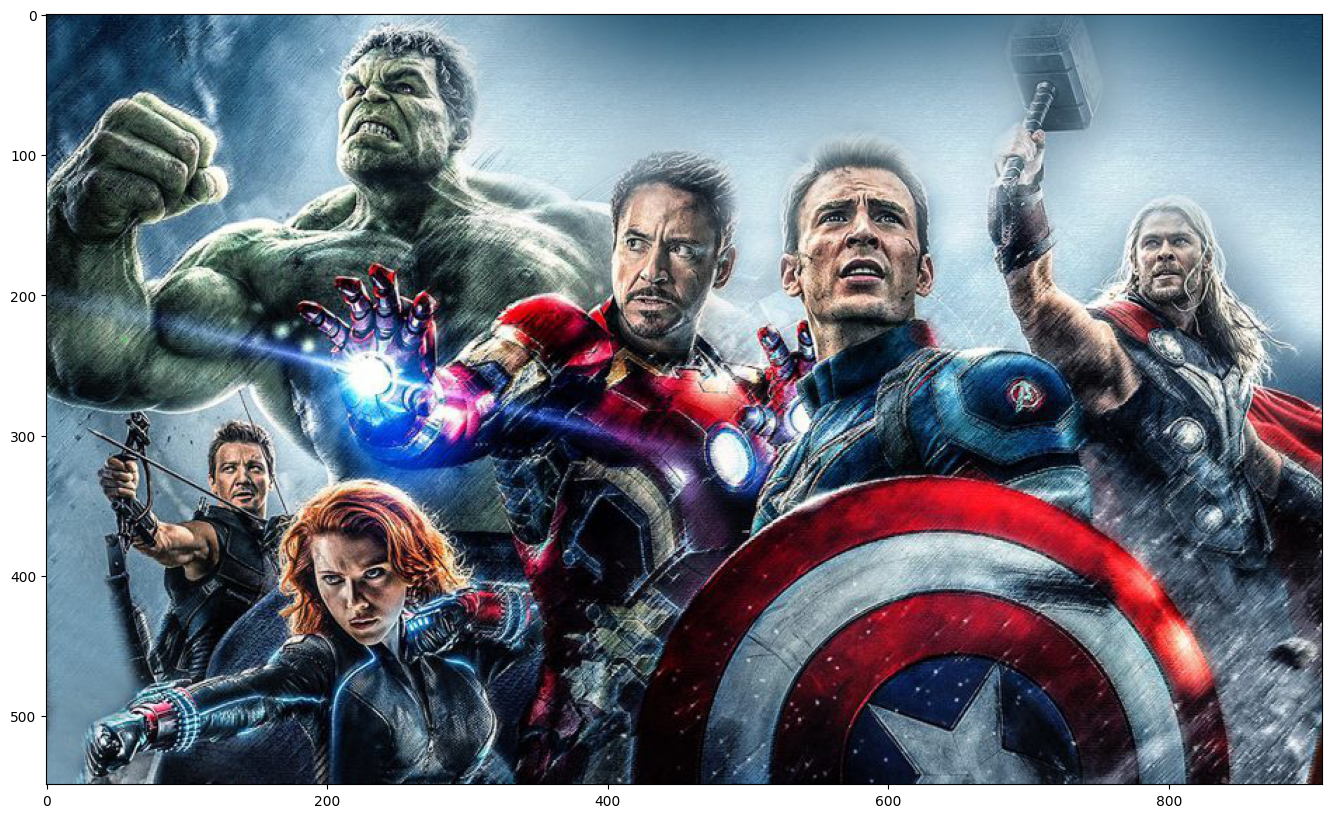

In [12]:
plt.figure(figsize=(20, 10)) # (20,10) is the maximum allowed figure size.
plt.imshow(image_rgb) # imshow changes the figure size to mantain the image's aspect ratio.
plt.show()

## 4. Access Image Pixels

In Python, a 2D image is represented as a Matrix. Each element of the matrix represents one **pixel**. Since a coluor image has 3 channels per pixel, our representation is not a simple Matrix, but is a 3-dimensional array called **Tensor**.

So let's try to access one random pixel. For example, one belonging to the Ironman's suit:

In [13]:
ironman_pixel = image[280,400]
print("The pixel value is:",ironman_pixel)

The pixel value is: [ 27   0 125]


With the previous notation we accessed to the pixel with ***row=280, column=400***. 

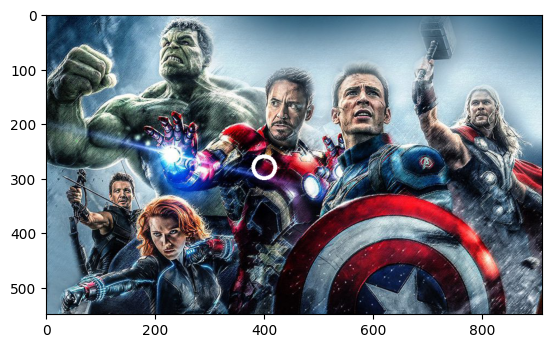

In [16]:
# !!!Only for visualization!!!

# Drawing a white circle around the selected pixel
# We first create a copy of the image to do the drawings without changing the original image
image_copy = np.copy(image)
cv2.circle(image_copy , (400,280), 20 ,[255, 255, 255], 5) # a quanto pare qua usa la convenzione (x, y) e non (row, col)
plt.imshow(cv2.cvtColor(image_copy,cv2.COLOR_BGR2RGB))
plt.show()

# !!!Only for visualization!!!

A RGB image has 3 values per pixel representing the red, green and blue channels.

In [17]:
# Accessing blue, green and red values of the pixel

blue = ironman_pixel[0]
green = ironman_pixel[1]
red = ironman_pixel[2]

print("The BGR value of the pixel is: B={},G={},R={}".format(blue,green,red))

The BGR value of the pixel is: B=27,G=0,R=125


As expected, the dominant color is **red** so the *red* value is higher than the *blue* and *green* values. What about an hulk pixel?

In [18]:
# Pixel vector
hulk_pixel = image[232,56]

# Separated colours
hulk_pixel_blue =  image[232,56,0]
hulk_pixel_green = image[232,56,1]
hulk_pixel_red =   image[232,56,2]

print("The BGR value of the pixel is: B={},G={},R={}".format(hulk_pixel_blue,hulk_pixel_green,hulk_pixel_red))

The BGR value of the pixel is: B=0,G=255,R=0


In the previous example, we have shown first of all that **Hulk is GREEN!**, then, we used another method to access image pixels. With two indices, we access the image pixel:

```
pixel = image[232,56]
```

Hence, we address each pixel component with another index:


```
red = pixel[2]
```

Or we can retrieve the pixel component directly with 3 indices:


```
pixel_red = image[232,56,2]
```







## 5. Grayscale Images vs. Coloured Images

In the previous sections, we addressed coloured images only. But what about grayscale images? 

To load a grayscale image, we need to add `cv2.IMREAD_GRAYSCALE` in our `cv2.imread()` function; **otherwise, OpenCV loads a 3-channel coloured image by default**:

In [25]:
# Loading a Grayscale image
grayscale_image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
# grayscale_image = cv2.imread('lenna.png')

print("The shape of this Grayscale Image is:", grayscale_image.shape)

The shape of this Grayscale Image is: (512, 512)


**N.B.** Grayscale images have only **1 channel** so when loading them we will have no 3rd dimension in our array! 

Let's show the image (we add the 3 arguments *cmap='gray', vmin=0, vmax=255* to tell the plot library that is a grayscale picture with values from 0 to 255):

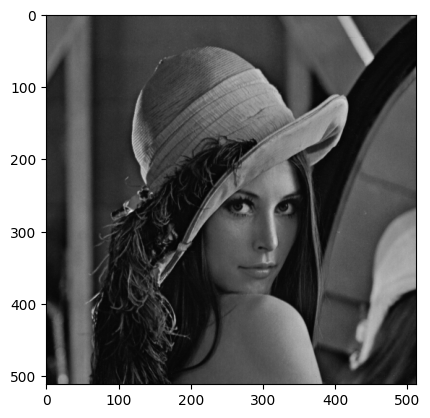

In [29]:
# gli argomenti vmin e vmax servono a controllare la scala di valori che viene mappata sulla colormap
# Se non li specifichi: Matplotlib li imposta automaticamente al minimo e massimo presenti nei tuoi dati:
# Se invece scrivi: plt.imshow(white_image, cmap='gray', vmin=100, vmax=200)
# - Tutti i valori ≤ 100 saranno visualizzati neri
# - Tutti i valori ≥ 200 saranno bianchi
# - I valori tra 100 e 200 saranno in sfumature di grigio.
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
# plt.imshow(grayscale_image)
plt.show()

So what about Pixels now? Each pixel now is not a vector anymore, but a single intensity value between 0-255.

In [30]:
print(grayscale_image[0,0])

101


**N.B.** Remember that a pixel value of 0 is **black** and a value of 255 is **white**.

Sometimes we want to convert color images into grayscale images. To do so we can use **cv2.cvtColor()** with a different flag:

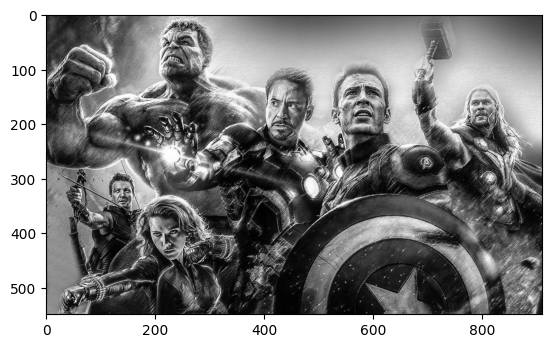

29


In [32]:
image_color2grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_color2grayscale, cmap='gray', vmin=0, vmax=255)
plt.show()

print(image_color2grayscale[0,0])

## 6. Access R, G, B channels separately

In colored images each channel R,G,B can be seen as a single R,G,B image and you can plot it independetly. 

If we want to access the three channels separately we can do it easily using slicing (same as Numpy arrays!).

In the following code we will extract the 3 channels representing the R,G,B values of the image and we will plot them in three different grayscale images:

In [34]:
R = image_rgb[:,:,0] # Getting the first axis, Red
G = image_rgb[:,:,1] # Getting the second axis, Green
B = image_rgb[:,:,2] # Getting the third axis, Blue

# Each channel can be seen as a grayscale image
print(R.shape, G.shape, B.shape)

(549, 910) (549, 910) (549, 910)


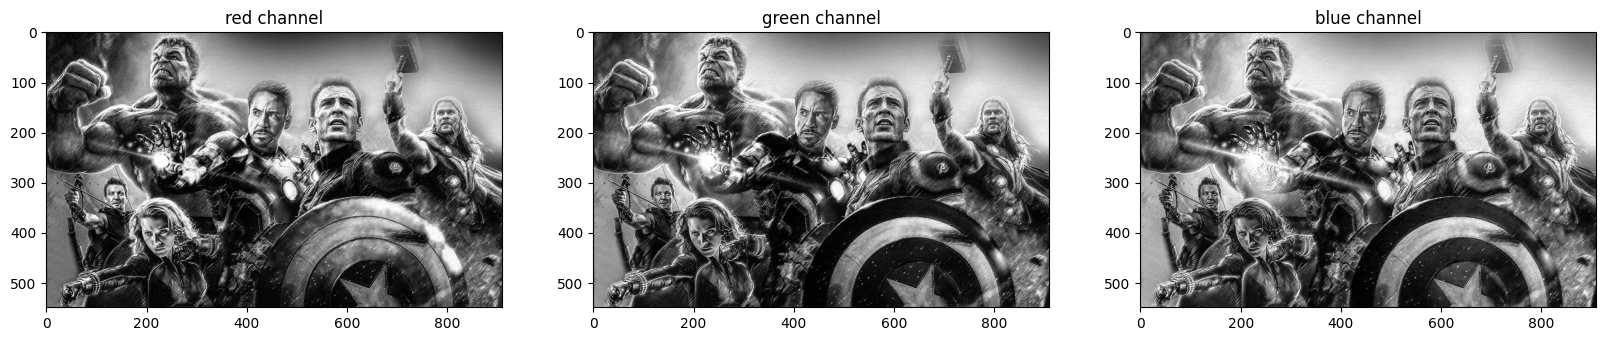

In [37]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.title("red channel")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.title("green channel")

plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.title("blue channel")
plt.show()

In the image above you cannot disambiguate the three images because the 3 axis contain similar information. But let us try with a completely green image: 

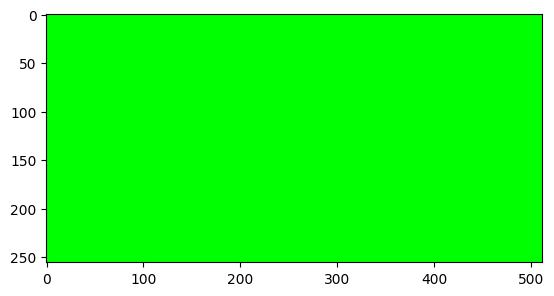

In [39]:
green_image_bgr = cv2.imread("green.png") # BGR by default
green_image_rgb = cv2.cvtColor(green_image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(green_image_rgb)
plt.show()

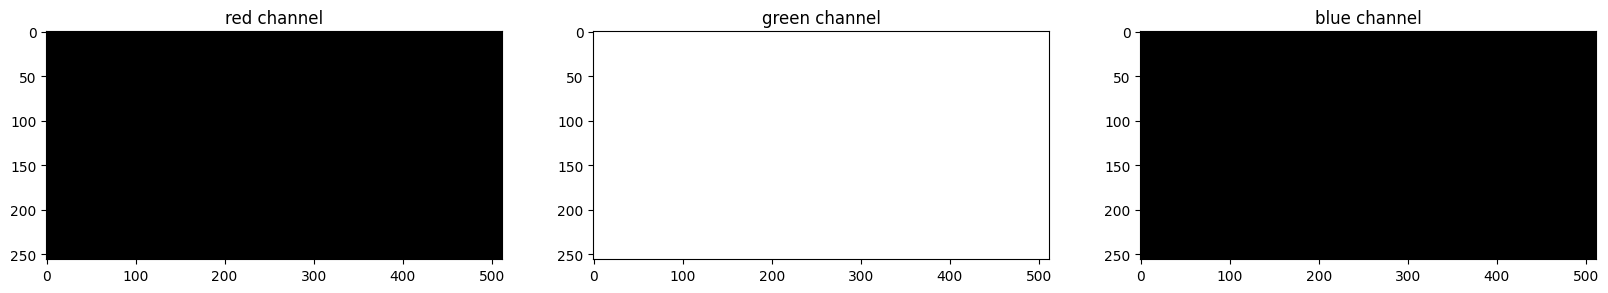

In [40]:
R = green_image_rgb[:,:,0] # Getting the first axis, Red
G = green_image_rgb[:,:,1] # Getting the second axis, Green
B = green_image_rgb[:,:,2] # Getting the third axis, Blue

plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.title("red channel")

plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.title("green channel")

plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.title("blue channel")
plt.show()

**Only the Green channel has values greater than 0!**
This is because only G channel has meaningful values different from 0.

**N.B.** Now that we know how to extract channels, we could perform the BGR to RGB conversion simply by splitting the channels and than concatenating them in the inverse order along the third dimension using **Numpy** methods. 

We can use `np.stack([R,G,B], axis=2)` to do that.

B, G and R shapes : (549, 910) (549, 910) (549, 910)
image_rgb shape :  (549, 910, 3)


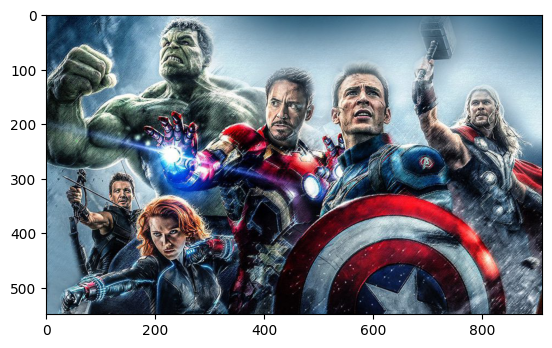

In [42]:
# Stacking B,G,R along the axes of channels (axis=-1, last channel).

B = image[:,:,0] # Getting the first axis, Red
G = image[:,:,1] # Getting the second axis, Green
R = image[:,:,2] # Getting the third axis, Blue

image_rgb = np.stack([R,G,B], axis=-1) # Axis specifies the position of the new axis. -1 means last position. 
print('B, G and R shapes :',B.shape, G.shape, R.shape)
print('image_rgb shape : ',image_rgb.shape)

plt.imshow(image_rgb)
plt.show()

## 7. Access Image Region of Interests (ROIs)

In the previous section, we have seen how to access single pixels. But what about a bigger portion of the image?
We just need to do **slicing** for all numpy arrays!

For example, if we want to extract Captain America from the starting image, what slicing do we need?

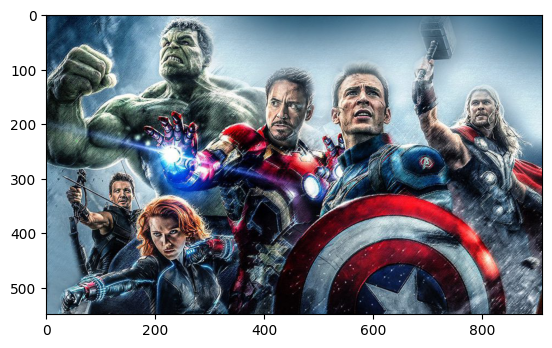

In [43]:
# Displaying starting image
plt.imshow(image_rgb)
plt.show()

To cut out **Captain America** of the image we need to perform the following slice:

In [44]:
captain_america = image_rgb[100:,400:820]

In the example above we accesed the RoI going from row 100 to last row (100:) and from column 400 to column 820 (400:820) to contain all Captain America.

**N.B.** The rows are ordered from top to bottom while the columns from left to right. 

Now let us show the selected RoI:

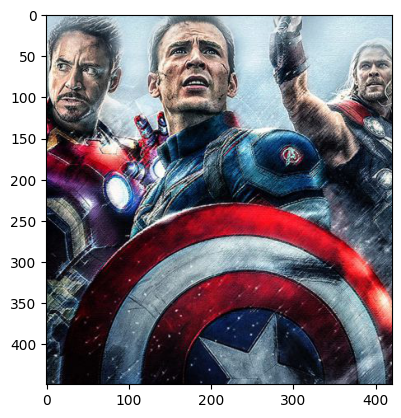

In [45]:
plt.imshow(captain_america)
plt.show()

## 8. Modify pixels and Save image

Up to now, we accessed pixels without modifying the original image.

If we want to edit the value of a single pixel of the image we could do:

In [46]:
print("Previous value: ", grayscale_image[0,0])
grayscale_image[0,0] = 255
print("New value: ",grayscale_image[0,0])

Previous value:  101
New value:  255


Typically, before modifying images, it is recommended to make a backup of those images. To do so, we first **copy** the images and then we perform all modifications on the copy of the images.

Moreover, we can modify more than one pixel at once. For example, let us try to edit the *lenna.png* grayscale image around a pupil of the girl:

In [47]:
# Copy of the original image
copied_image = grayscale_image.copy()

# Pupil coordinates
center_row = 264
center_column = 268
radius = 5

new_color = 255 # White

copied_image[center_row-radius : center_row+radius, center_column-radius:center_column+radius] = new_color

Show the image:

In [48]:
plt.imshow(copied_image, cmap='gray', vmin=0, vmax=255)
plt.show()

We can notice how the original image stayed unchanged:

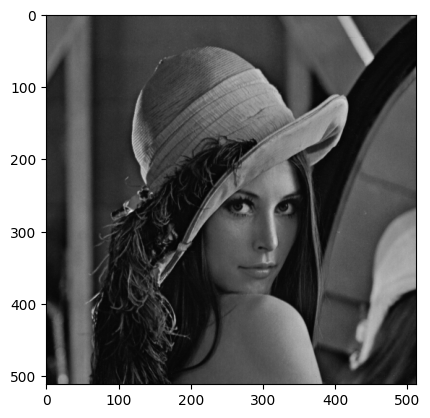

In [49]:
plt.imshow(grayscale_image, cmap='gray', vmin=0, vmax=255)
plt.show()

When you have done the modifications, you can save the image on disk.

In [39]:
cv2.imwrite("lenna_white_pupill.png", copied_image)

True

In case of **coluor images** if we want to modify a pixel we have to assing 3 values, one for each channel BGR:

In [50]:
copied_image_rgb = image_rgb.copy()

print("Previous value: ", copied_image_rgb[0,0])
copied_image_rgb[0,0] = [255,255,255]
print("New value: ", copied_image_rgb[0,0])

Previous value:  [18 32 43]
New value:  [255 255 255]


Same as in grayscale images, we can modify more RGB pixels at once. Let us try to mask Captain America, assigning all white pixels to the RoI:

In [52]:
copied_image_rgb[100:,400:820] = np.asarray([255,255,255]) # nota il broadcast
plt.imshow(copied_image_rgb)
plt.show()

In the same way as before, we can save the image. With `cv2.imwrite` we can save our image with several codings such as *.png, .jpg, .bmp, etc ...*. 

**N.B** As for loading the image, OpenCV expects to have a BGR image by default, but we performed the masking operation on an RGB image. Remember to convert back to BGR before saving!

In [42]:
copied_image_bgr = cv2.cvtColor(copied_image_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite("avengers_no_captain_america.jpg", copied_image_bgr)

True